## Demo for learning dual channel PSF from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
#gpus = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='voxel',channeltype='MF',sysfile='MF')

##### Edit user defined parameters

In [5]:
L.param.datapath = r'E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = '60nm' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 10
L.param.ccd_offset = 2210
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.06 # micron, equal to z_step*stepsize_of_the_data
L.param.ref_channel = 0 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.max_bead_number = 100 
L.param.roi.peak_height = 0.4 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.batch_size = 10 # lower this number if out of memory 
L.param.loss_weight.smooth = 50

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{mirrortype}}$   | `'up-down', 'left-right'` | `'up-down'`
$\small\color{skyblue}{\mathrm{channel\_arrange}}$   | `'up-down', 'left-right'` | `'up-down'`

Optional parameters for zernike PSF learning, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'zernike', 'zernike_vector', 'pupil', 'pupil_vector'` | `'zernike_vector'`


##### Start learning

In [6]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\010_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\002_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\003_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\004_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\005_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\006_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\007_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\008_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\009_560_60nmStep_40laser.tif
E:\EMBL files\data 2022\PSF_MFM 200nm beads_60nmStep_560nmLaser\high\001_560_60nmStep_99laser.tif
(9, 10, 100, 170, 17

3/6: learning: 81/100 [00:18s]  4.47it/s, current loss: 239.61145, total time: 18.11s  
c:\Users\Sheng\Documents\git\python\PSFLearning\demo\..\psflearning\learning\psfs\PSFVolumeBased_file.py:101: ComplexWarning: Casting complex values to real discards the imaginary part
  I_model = I_model.astype(np.float32)
3/6: learning: 77/100 [00:17s]  4.50it/s, current loss: 181.82988, total time: 35.22s
3/6: learning: 109/? [00:24s]  4.51it/s, current loss: 160.33833, total time: 59.41s   
3/6: learning: 70/100 [00:15s]  4.42it/s, current loss: 155.71149, total time: 75.23s
3/6: learning: 97/100 [00:21s]  4.49it/s, current loss: 46.23787, total time: 96.84s
3/6: learning: 73/100 [00:16s]  4.52it/s, current loss: 127.12335, total time: 112.99s
3/6: learning: 82/100 [00:17s]  4.59it/s, current loss: 120.51253, total time: 130.83s
3/6: learning: 82/100 [00:17s]  4.62it/s, current loss: 105.48569, total time: 148.57s
3/6: learning: 77/100 [00:16s]  4.63it/s, current loss: 136.90274, total time: 165

outlier id: [8 9]
rois shape channel 0: (42, 87, 21, 21)
rois shape channel 1: (42, 87, 21, 21)
rois shape channel 2: (42, 87, 21, 21)
rois shape channel 3: (42, 87, 21, 21)
rois shape channel 4: (42, 87, 21, 21)
rois shape channel 5: (42, 87, 21, 21)
rois shape channel 6: (42, 87, 21, 21)
rois shape channel 7: (42, 87, 21, 21)
rois shape channel 8: (42, 87, 21, 21)


3/6: learning: 38/250 [01:17s]  2.04s/it, current loss: 1245.61206, total time: 452.16s
4/6: calculating spline coefficients: 9/9 [00:28s]  3.12s/it total time: 480.17s
5/6: localization: 10/10 [01:35s]  9.60s/it total time: 576.12s
6/6: saving results: [00:56s] total time: 633.12s


##### Show results

In [7]:
resfile

'E:\\EMBL files\\data 2022\\PSF_MFM 200nm beads_60nmStep_560nmLaser\\high/psfmodel_voxel_multi.h5'

In [8]:
f,p = io.h5.load(resfile) # load result file

In [11]:
f.locres.keys()

dict_keys(['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc'])

In [9]:
print('output parameters')
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

output parameters
f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6', 'channel7', 'channel8', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']


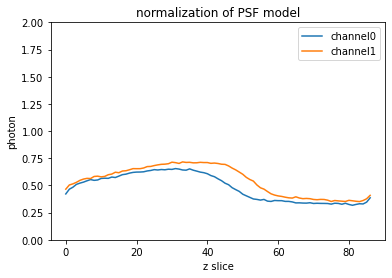

In [12]:
plt.plot(np.sum(f.res.channel0.I_model,axis=(-1,-2)),label='channel0')
plt.plot(np.sum(f.res.channel1.I_model,axis=(-1,-2)),label='channel1')
plt.ylim([0,2])
plt.xlabel("z slice")
plt.ylabel("photon")
plt.title("normalization of PSF model")
plt.legend()
plt.show()

channel 0


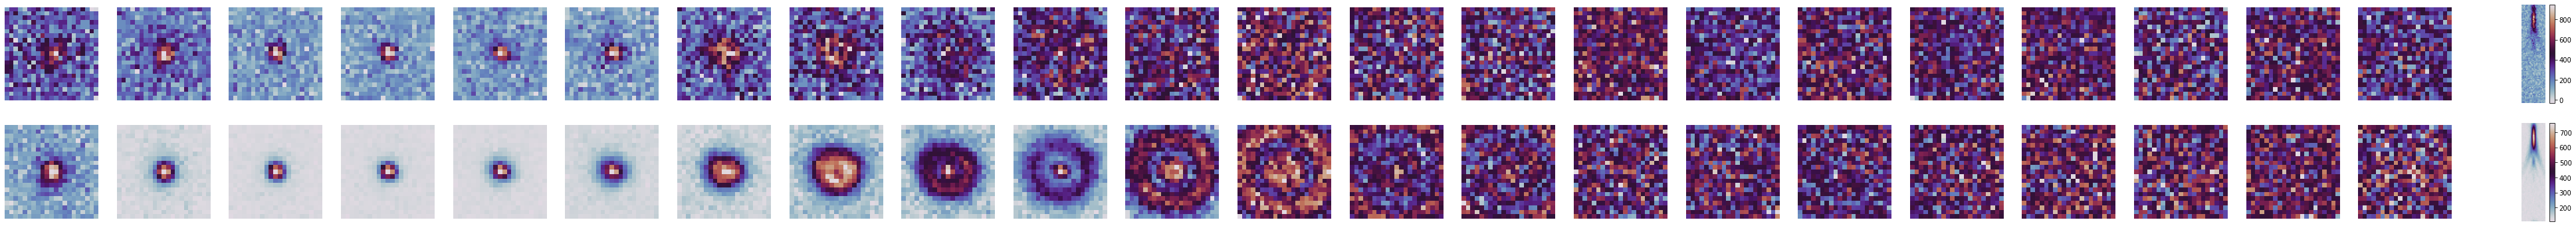

channel 1


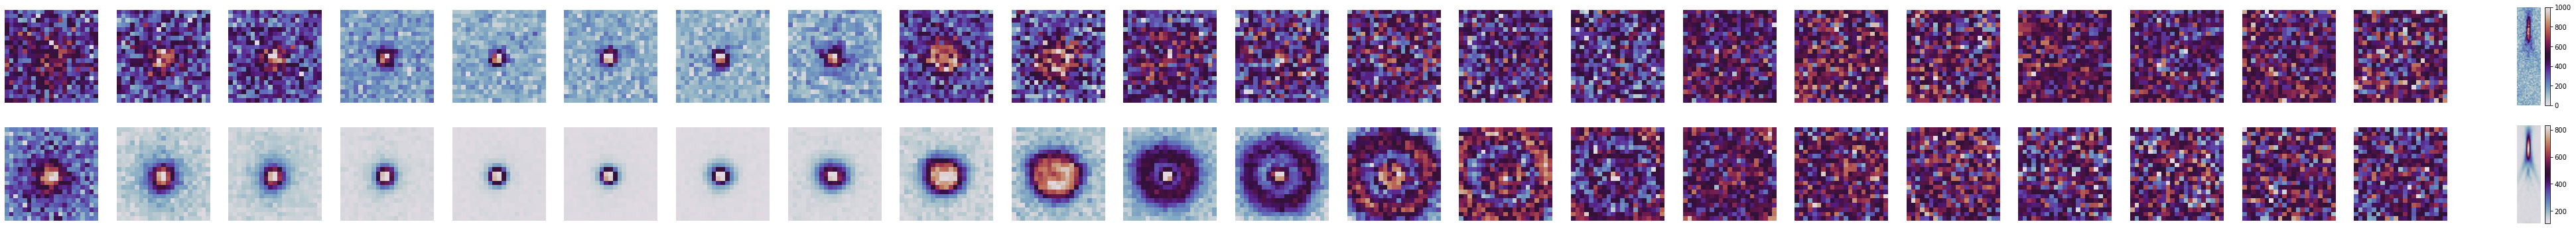

channel 2


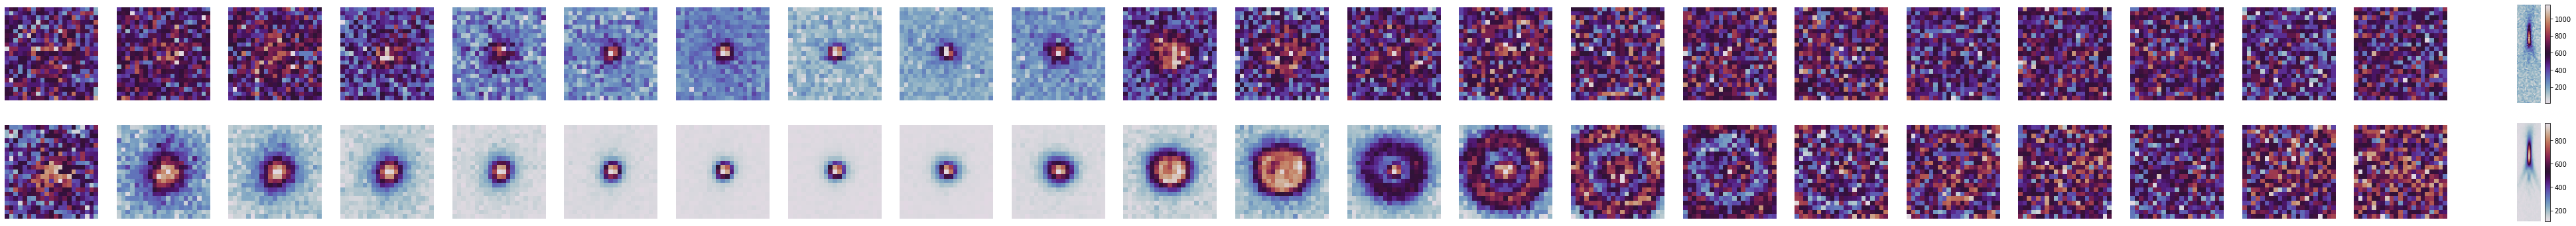

channel 3


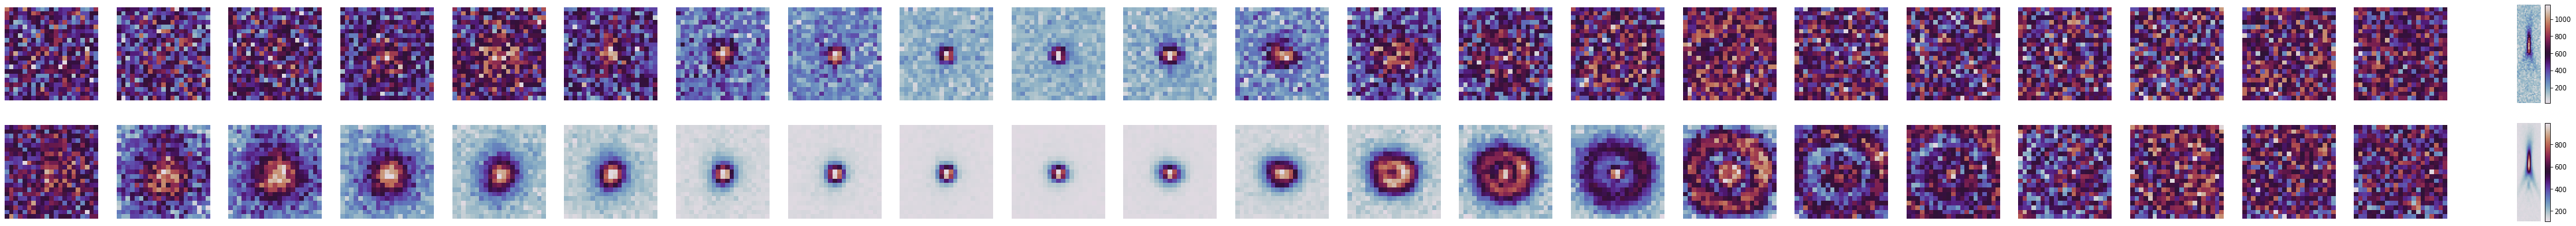

channel 4


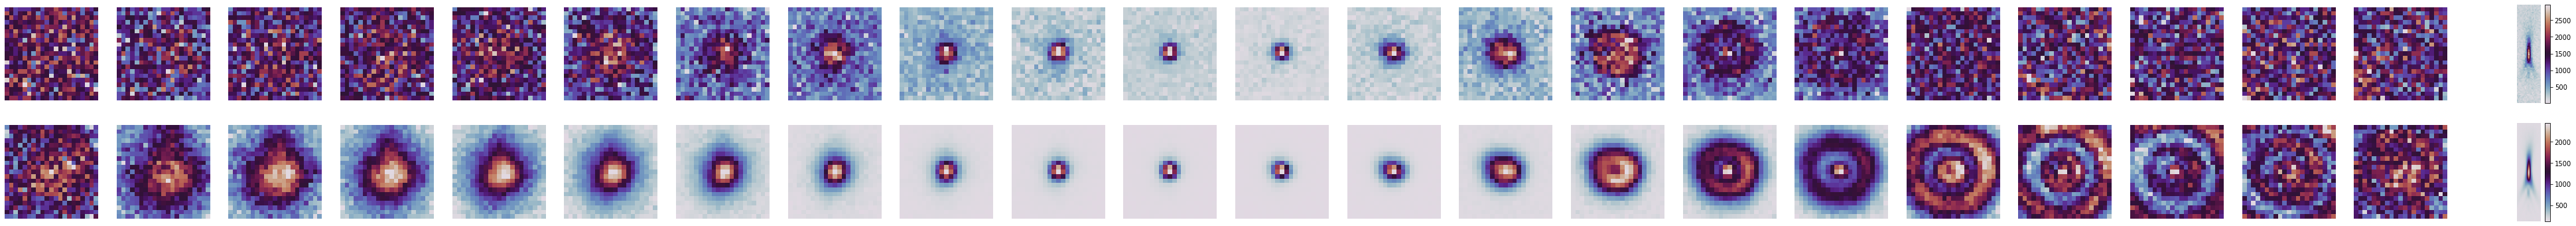

channel 5


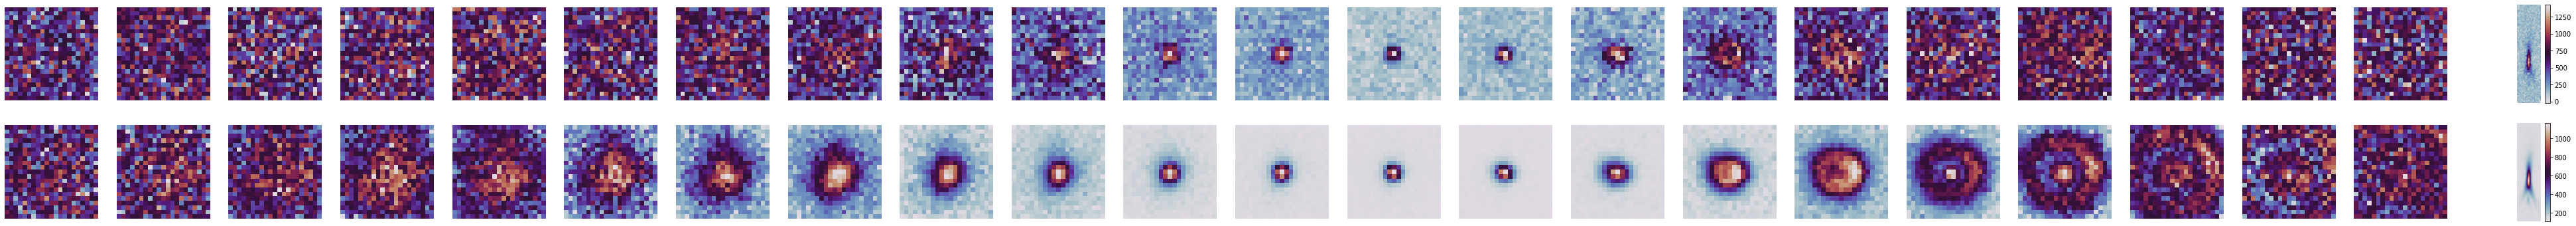

channel 6


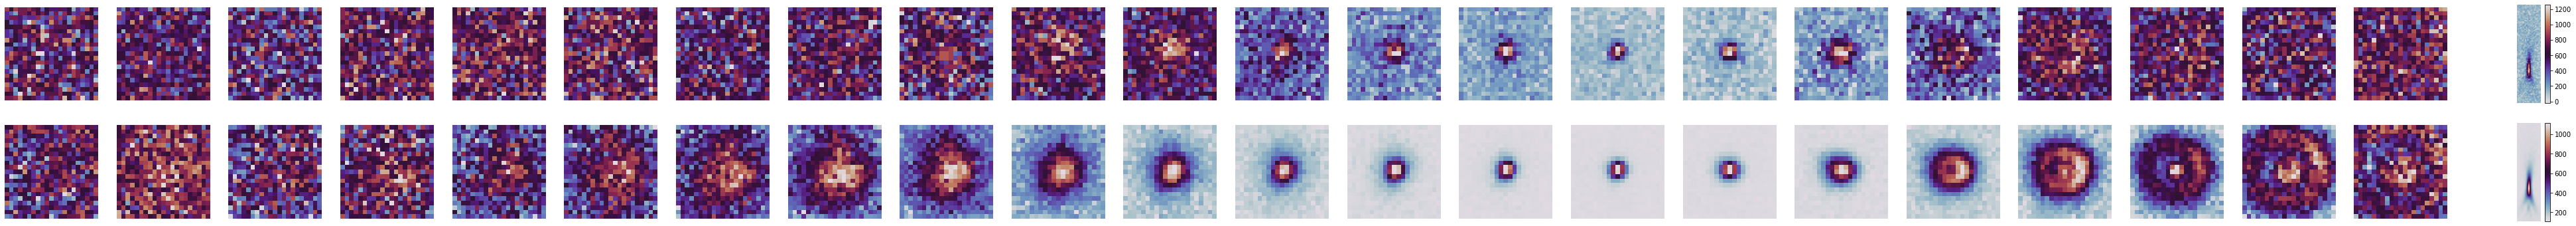

channel 7


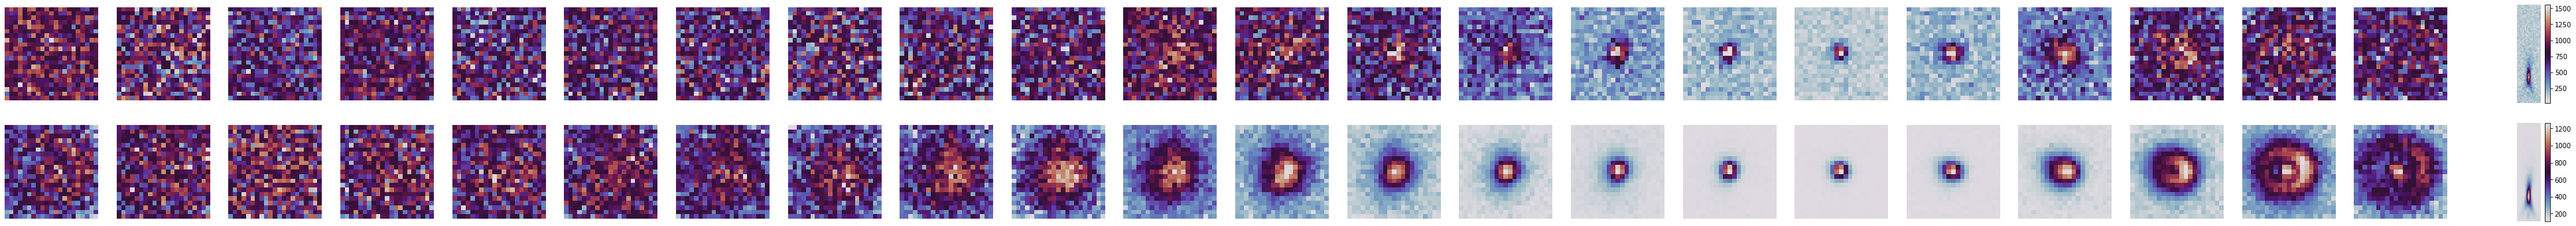

channel 8


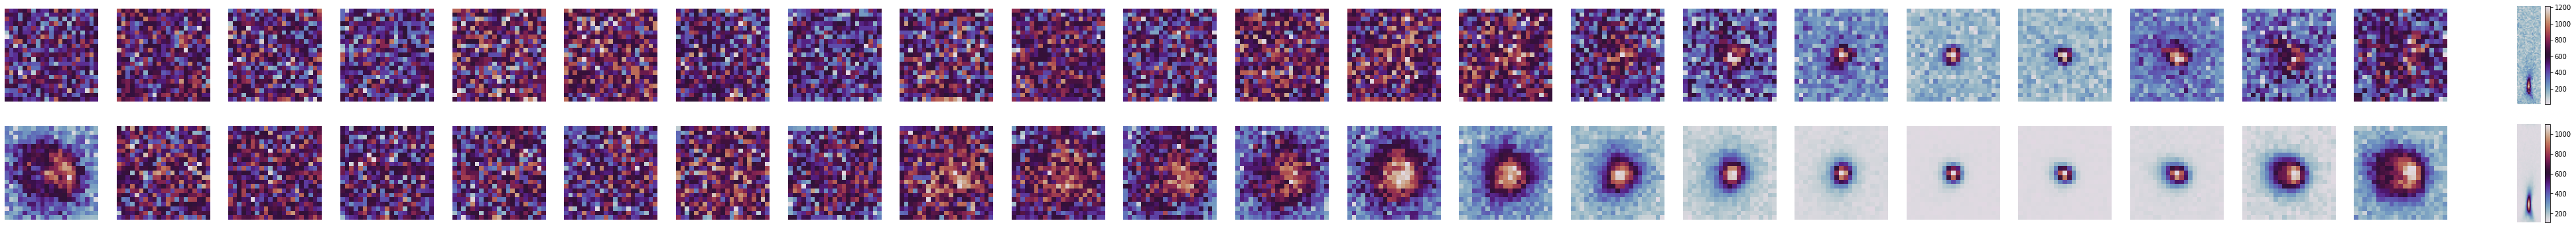

In [14]:
showpsfvsdata(f,p,index=0)

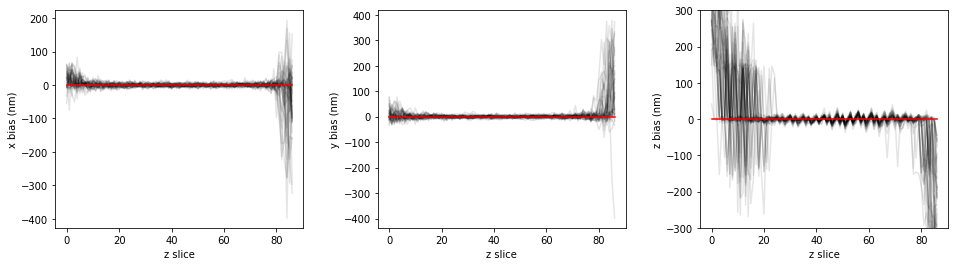

In [15]:
showlocalization(f,p)

##### Optional plots

In [ ]:
try:
    showpupil(f,p)
except:
    print('no pupil')

In [ ]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[[ 0.9996 -0.0014 -0.    ]
  [-0.0028  1.0001 -0.    ]
  [ 0.6431  5.2806  1.    ]]

 [[ 0.9991 -0.0024 -0.    ]
  [-0.0055  1.0006 -0.    ]
  [ 2.0306 10.8615  1.    ]]

 [[ 0.9956 -0.0004 -0.    ]
  [-0.0002  0.9984 -0.    ]
  [ 6.2039 -1.0436  1.    ]]

 [[ 0.9962 -0.0007 -0.    ]
  [-0.003   0.9992 -0.    ]
  [ 6.7224  3.678   1.    ]]

 [[ 0.9949 -0.0019 -0.    ]
  [-0.005   0.9994 -0.    ]
  [ 8.3528  8.6676  1.    ]]

 [[ 0.9919 -0.0008 -0.    ]
  [-0.0002  0.9983 -0.    ]
  [13.1229 -3.1112  1.    ]]

 [[ 0.9914 -0.0007 -0.    ]
  [-0.0024  0.9978 -0.    ]
  [13.5342  1.6839  1.    ]]

 [[ 0.9905 -0.0015 -0.    ]
  [-0.0047  0.9977 -0.    ]
  [15.029   6.862   1.    ]]]


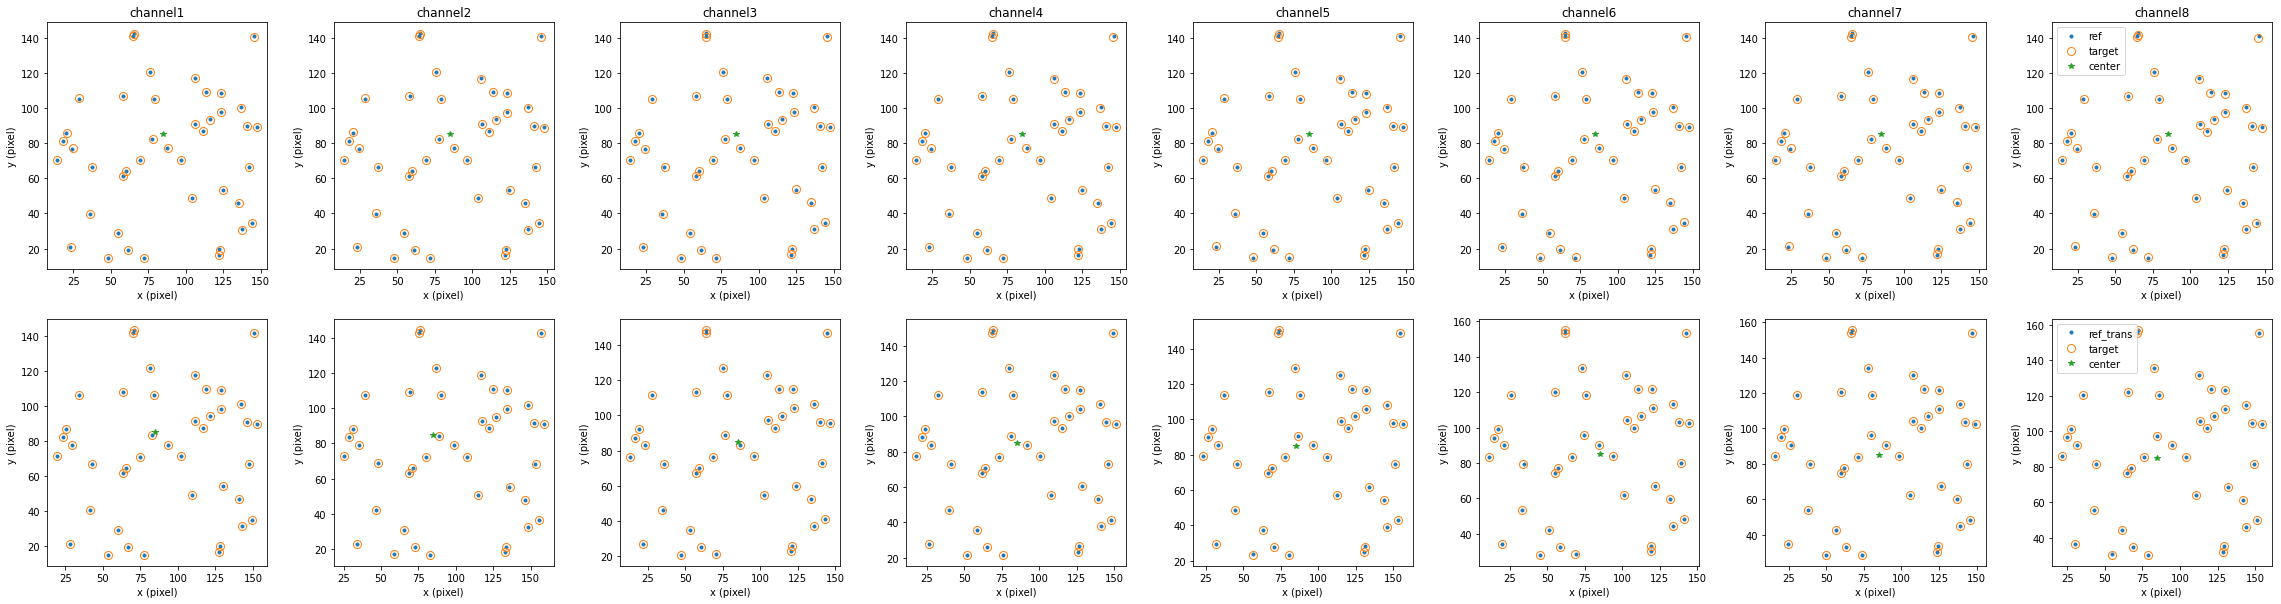

In [16]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

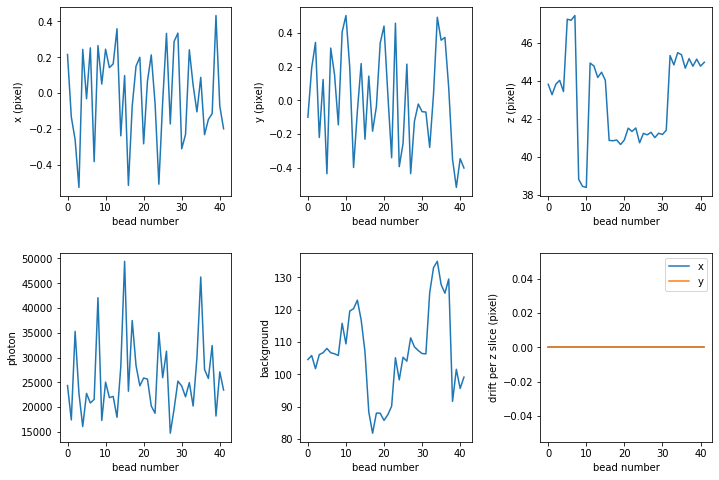

In [17]:
showlearnedparam(f,p)

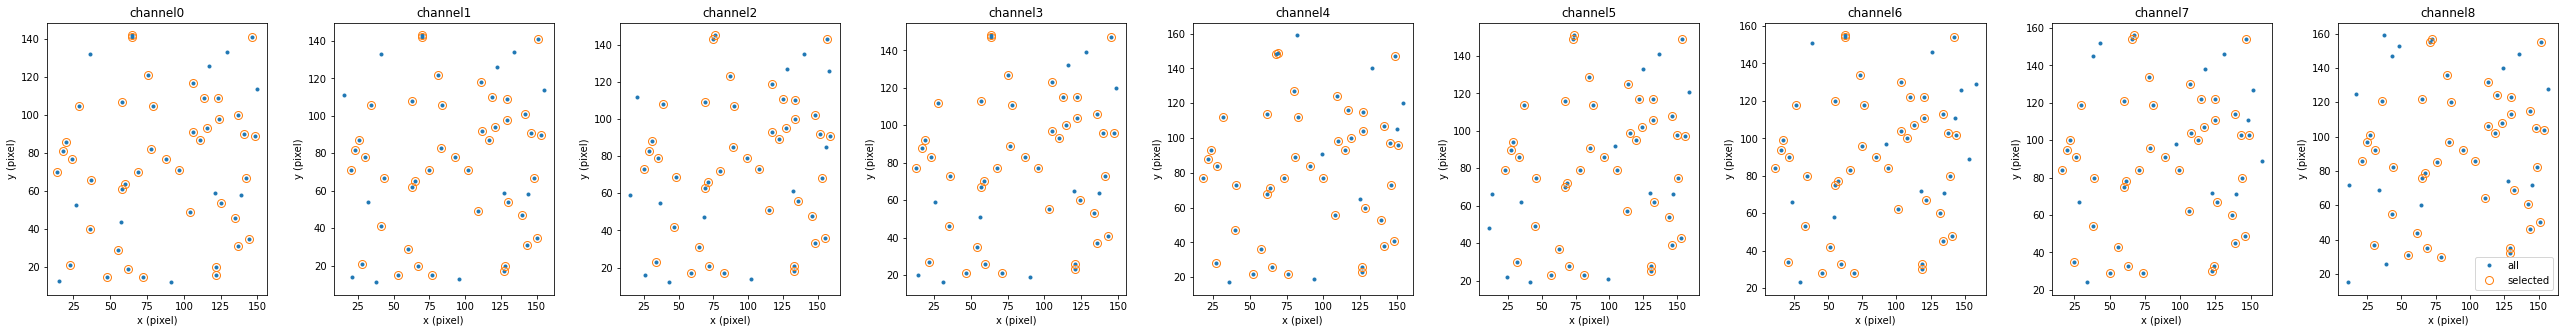

In [18]:
showcoord(f,p)